***Credits: This practice was proposed by Prof. Manuel García Sánchez***


# Instructions

**Using Python (Jupyter Note), solve the following problems.**

1.  **Upload the .ipyjn file (practice4_name_student.ipynb)**

2.  **Write an individual report including and explaining the results of
    the computation and the plots of the figures.**

## Lab work: Positioning in wireless networks

### Introduction:

As you know now GPS receivers need signals from at least four satellites to make a position fix. This can be easily achieved in open spaces, outdoors, but is more difficult in areas like towns, with tall buildings, as just a little portion of the sky may be visible. As an alternative, positioning can be achieved by using other communications systems, like GSM, UMTS or wireless data networks (WiFI, Zigbee, etc). In these networks mobile units and base stations interchange information to establish the communication channel. Part of this this information may be also useful to locate the mobile unit.

### Aim:

To study an example of location of a blind node in a Zigbee wireless network using signal strength information (RSSI).

### Problem description:

* The network is made up of six reference nodes at fixed known positions and a blind node at an unknown position that has to be located. 
* There is also a gateway node that works as coordinator node connected to a computer.
* Blind nodes broadcast messages that are used by the reference nodes to estimate the signal strength (RSSI). 
* This information is sent to the coordinator node via the blind node. 
* The positioning algorithm is run at the computer, where the RSSI information is used together with the stored positions of the reference nodes to calculate the position.

$$
Reference Nodes=\left[\begin{array}{ccc}
1 & 0.00 & 2.25  \\
2 & 0.00 & 5.25  \\
3 & 4.50 & 3.50  \\
4 & 4.50 & 5.25  \\
5 & 4.50 & 0.00  \\
6 & 0.00 & 0.00 
\end{array}\right]
$$

## Problem 1: Simple positioning algorithm

Students should first develop a simple positioning algorithm. The blind node position will be estimated by the position of the nearest reference node.

* According to the previous specifications elaborate a message protocol so the information required for the positioning reaches the computer. The protocol should indicate the number of messages transmitted by each node, the information it contains and the destination node.
* How many messages are needed? Once all the information is available at the computer, how can be the position calculated? What problems could cause the position estimation fail?



In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

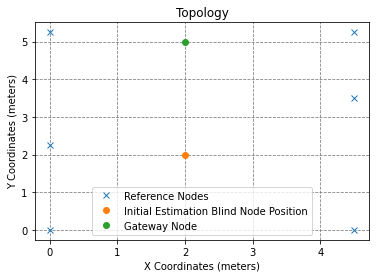

In [4]:
reference_nodes = np.matrix([ #estos son los nodos de referencia
    [1, 0.00, 2.25]                                                           
    ,[2, 0.00, 5.25]
    ,[3, 4.50, 3.50]
    ,[4, 4.50, 5.25]
    ,[5, 4.50, 0.00]
    ,[6, 0.00, 0.00]
    ])    

blind_node_initial_estimation = np.matrix([2, 2]) #este es el nodo ciego que hay que localizar
gateway_node = np.matrix([2, 5])#nodo pasarela que coordina conectado a un ordenador
 


ax = plt.subplot(111)
plt.title('Topology')
plt.grid(True)

ax.plot(reference_nodes[:,1],reference_nodes[:,2],'x',label='Reference Nodes')
ax.plot(blind_node_initial_estimation[0,0],blind_node_initial_estimation[0,1],'o',label='Initial Estimation Blind Node Position')
ax.plot(gateway_node[0,0],gateway_node[0,1],'o',label='Gateway Node')
ax.set(xlabel="X Coordinates (meters)", ylabel="Y Coordinates (meters)",
       title="Topology")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.legend()
plt.show()

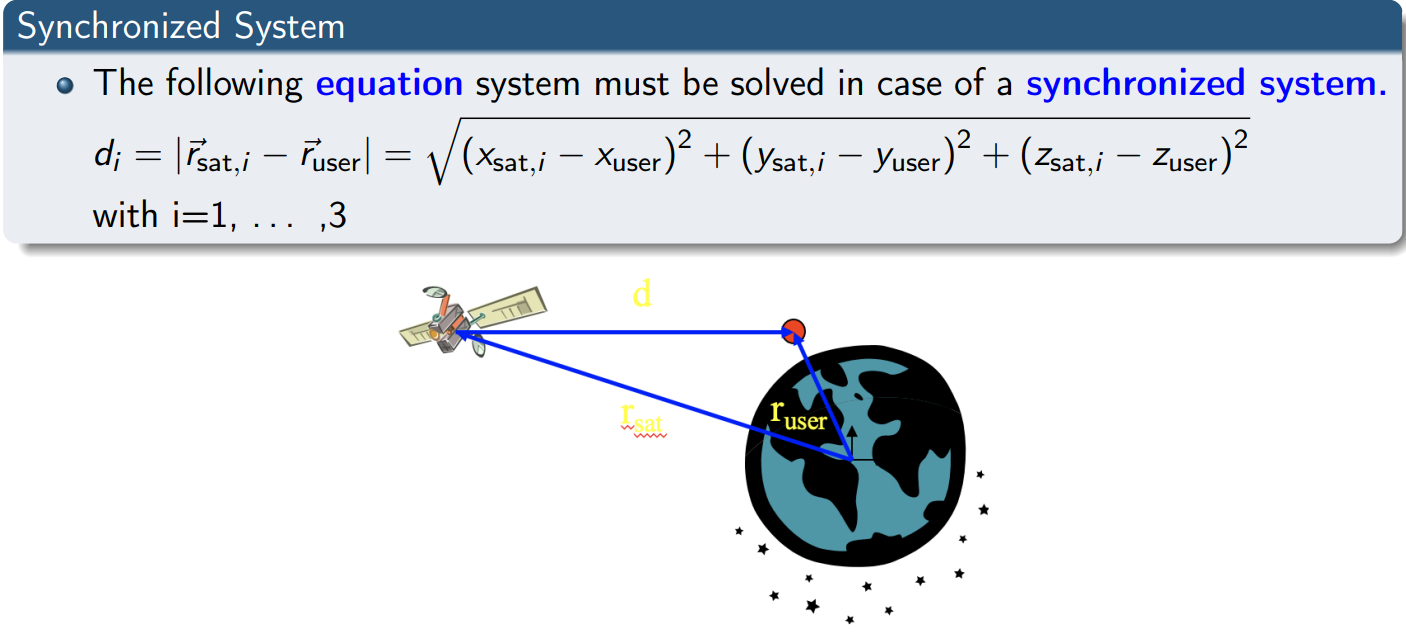




First, we apply that formula (in two dimensions) to calculate the distance, we use the values of the reference nodes and the gateway node.

In [7]:
#Calculamos las distancias de los puntos de referencia al nodo pasarela
p1=((0-2)**2 +(2.25-5)**2)**0.5
p2=((0-2)**2 +(5.25-5)**2)**0.5
p3=((4.5-2)**2 +(3.5-5)**2)**0.5
p4=((4.5-2)**2 +(5.25-5)**2)**0.5
p5=((4.5-2)**2 +(0-5)**2)**0.5
p6=((0-2)**2 +(0-5)**2)**0.5
pri= [p1,p2,p3,p4,p5,p6]

Now we calculate the estimated distance, using the same formula as before, but with the values of the blind node instead of the gateway node

In [6]:
d1=((0-2)**2 +(2.25-2)**2)**0.5
d2=((0-2)**2 +(5.25-2)**2)**0.5
d3=((4.5-2)**2 +(3.5-2)**2)**0.5
d4=((4.5-2)**2 +(5.25-2)**2)**0.5
d5=((4.5-2)**2 +(0-2)**2)**0.5
d6=((0-2)**2 +(0-2)**2)**0.5
dest=[d1,d2,d3,d4,d5,d6]

[2.0155644370746373, 3.816084380618437, 2.9154759474226504, 4.100304866714182, 3.2015621187164243, 2.8284271247461903]


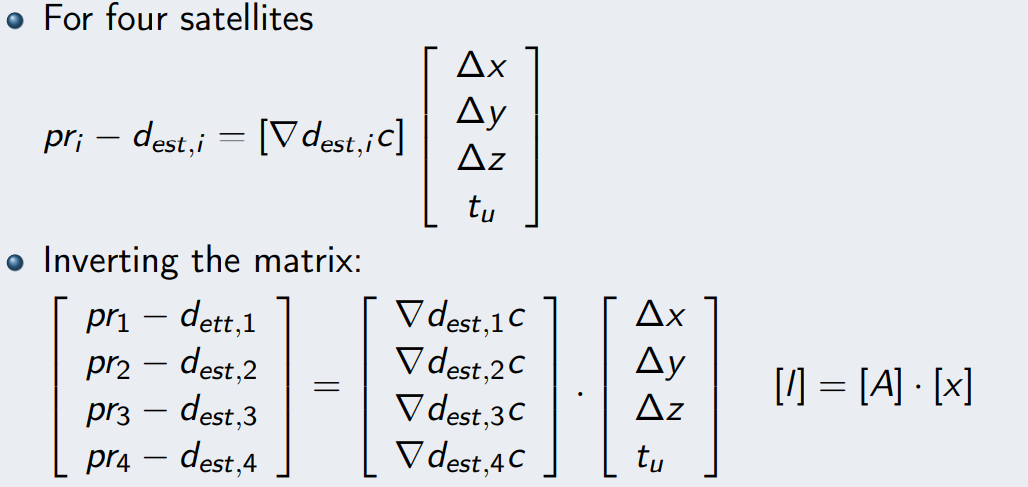


Now we adapt this formula to our case, in which there are six points instead of four.

In [22]:
I =np.matrix([
    [p1-d1],
    [p2-d2],
    [p3-d3],
    [p4-d4],
    [p5-d5],
    [p6-d6],
])
A=np.matrix([
    [d1],
    [d2],
    [d3],
    [d4],
    [d5],
    [d6],
])
#X = inverso(A)*I,, np.transpose(x)
Y=(np.transpose(A)*A)**-1
Z= np.transpose(A)*I
X=Y*Z
print(X)


[[0.06895976]]


This x value is the error, meaning that the blind node positions have an error of plus minus x.

Two messages are needed for each reference node, one for the blind node and one for the gateway node, for a total of twelve messages.

The final position will be the position of the blind node plus minus the error made in the measurement.
Matrix A could cause errors in the measurement.

## Problem 2: 2D algorithm

For this case the position algorithm should calculate the (X,Y) coordinates of the blind nodes from the RSSI measurements and the reference nodes positions. This information is be stored in matrix $RN_{aux}$:

$$
R N_{a u x}=\left[\begin{array}{cccc}
I D_{R N 1} & X_{R N 1} & Y_{R N 1} & R S S I_{R N 1}(d B m) \\
I D_{R N 2} & X_{R N 2} & Y_{R N 2} & R S S I_{R N 2}(d B m) \\
\cdots & \cdots & \cdots & \cdots \\
I D_{R N 6} & X_{R N 6} & Y_{R N 6} & R S S I_{R N 6}(d B m)
\end{array}\right]
$$

The distance is estimated from the RSSI assuming that power decreases exponentially when distance to the node increases:

$$ RSSI_{Ni}(dBm)=P_0(dBm)-10n\log_{10} d(m)$$

and we know the power at 1m from the blind node ($P_0$) and the power decay exponent (n).

* You should write and iterative algorithm that begins with an initial estimation of the blind node position (X0,Y0) and minimizes the rms error of the position estimation. (Take GPS algorithm as a reference).

* Please indicate the part of the code that should be iterated and a condition to stop iterations. Indicate also the minimum number of reference nodes needed for the algorithm to work. Will the algorithm always converge?

* Calculate the blind node position if you have $P_0=-32$ dBm and n=5.5, $(X_0,Y_0) =(2,2)$ and the matrix:

$$
R N_{\text {aux}}=\left[\begin{array}{cccc}
1 & 0.00 & 2.25 & -53 \\
2 & 0.00 & 5.25 & -57 \\
3 & 4.50 & 3.50 & -59 \\
4 & 4.50 & 5.25 & -60 \\
5 & 4.50 & 0.00 & -69 \\
6 & 0.00 & 0.00 & -75
\end{array}\right]
$$

* How many iterations were needed for the algorithm to converge?


In [25]:
rn = np.matrix([ #rn auxiliar
    [1, 0.00, 2.25, -53]                                                           
    ,[2, 0.00, 5.25, -57]
    ,[3, 4.50, 3.50, -59]
    ,[4, 4.50, 5.25, -60]
    ,[5, 4.50, 0.00, -69]
    ,[6, 0.00, 0.00, -75]
    ])  
n=5.5
d1= 10**((-32+53)/(10*n))
d2= 10**((-32+57)/(10*n))
d3= 10**((-32+59)/(10*n))
d4= 10**((-32+60)/(10*n))
d5= 10**((-32+69)/(10*n))
d6= 10**((-32+75)/(10*n))
d=[d1,d2,d3,d4,d5,d6] #así tenemos estimada la distancia



[2.4088967285183034, 2.8480358684358014, 3.0967709969353527, 3.2291699999438985, 4.706816559609248, 6.050875007272944]


## Problem 3: Algorithm improvement



**3.1 Algorithm tuning**

* The solution of this algorithm will depend on $P_0$ and $n$, and these parameters depend on the environment. How could these parameters be estimated using the algorithm you designed?
* Calculate $P_0$ and $n$ if the blind node is placed at $(0.75, 4.25)$ and you have the previous $RN_{aux}$ matrix

**3.2 RAIM**

* How could the algorithm be modified so it implements RAIM?

**3.3 3D**

* How could the 2D algorithm be extended to 3D?

The first thing would be to use three-coordinate nodes instead of two-coordinate nodes.